### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
data = sm.datasets.sunspots.load_pandas()
sunspots = data.data.copy()
air = pd.read_csv('C:/Users/hande/Downloads/AirPassengers.csv')

## SUNSPOTS

In [91]:
import statsmodels.api as sm


data = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
data.index = pd.date_range(start='1712', end='2021', freq='A')

y_hist = data.loc['1950':'2010','SUNACTIVITY']     # size 25
y_future = data.loc['2011':,'SUNACTIVITY']         # size 10

h = len(y_hist)
f = len(y_future)

In [76]:
sunspots.head(10)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


In [77]:
sunspots.tail(10)

,YEAR,SUNACTIVITY
299,1999.0,93.3
300,2000.0,119.6
301,2001.0,111.0
302,2002.0,104.0
303,2003.0,63.7
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


In [78]:
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [79]:
sunspots.set_index(pd.to_datetime(sunspots['YEAR'], format = '%Y'), inplace = True)
sunspots.drop(columns = ['YEAR'], inplace = True)

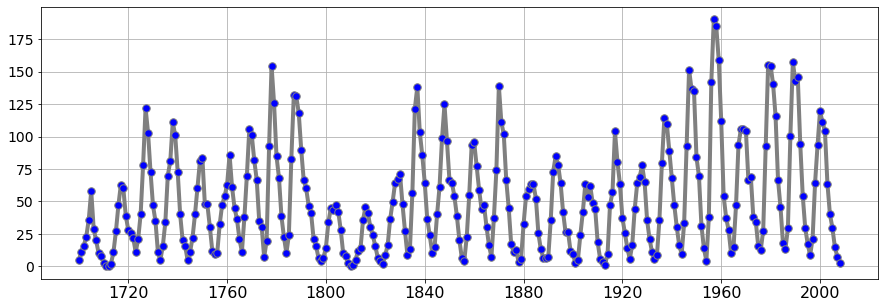

In [92]:
# Data_Sunspots

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('white')
plt.plot(y2_hist,'.-',
         markerfacecolor='blue',
         markersize=15,
         linewidth=4,
         color='grey')
plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
# plt.xlim((6000, 19000))
myylim = plt.ylim()

# Train an model

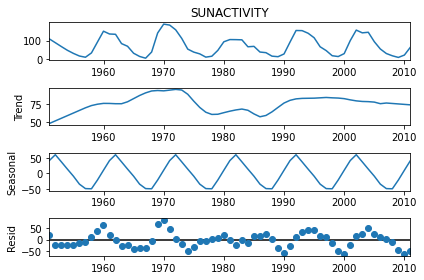

In [93]:
# PERIOD 10

result1 = seasonal_decompose(y_hist, period=10, model='additive', extrapolate_trend=True)
result1.plot()
plt.show()

In [95]:
# Make a forecast

y_forecast = result1.trend
y_forecast = y_forecast.append(y_future)
y_forecast[-f:] = np.NaN

y_forecast.interpolate(method='linear',inplace=True)

y_forecast = y_forecast[-f:]
y_forecast = y_forecast + res.seasonal[y_forecast.index - pd.DateOffset(years=period)].values

C:\Users\hande\AppData\Local\Temp\ipykernel_2936\2119988452.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_forecast = y_forecast.append(y_future)


In [96]:
y_future['2011-12-31'] = 135.0
y_future['2014-12-31'] = 81.0
y_future['2020-12-31'] = 45.0

C:\Users\hande\AppData\Local\Temp\ipykernel_2936\2614840092.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  plt.plot(y_forecast,'.-',


(-9.51, 199.70999999999998)

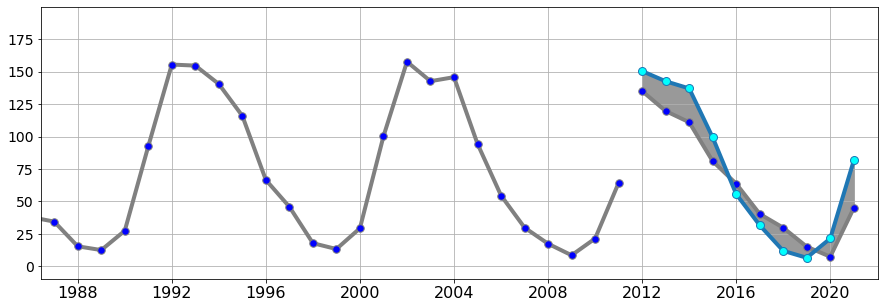

In [99]:
# plot
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('white')

plt.plot(y_hist,'.-',
         markerfacecolor='blue',
         markersize=15,
         linewidth=4,
         color='gray')

plt.plot(y_future,'.-',
         markerfacecolor='blue',
         markersize=15,
         linewidth=4,
         color='gray')

plt.plot(y_forecast,'.-',
         linewidth=4,marker='o',
         markerfacecolor='cyan',
         markersize=8)

plt.fill_between(y_forecast.index, y_forecast, y_future,color=(0.6,0.6,0.6))

plt.grid()
# ax.get_yaxis().set_visible(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
plt.xlim((6000, 19000))
plt.ylim(myylim)


In [100]:
# evaluate error

forecast_error = y_future - y_forecast
e1 = forecast_error.abs().mean()
e2 = np.sqrt( forecast_error.pow(2).mean() )

print(e1, e2)

17.633866666666634 19.596866323329404


Text(0, 0.5, 'Sunspots Trend')

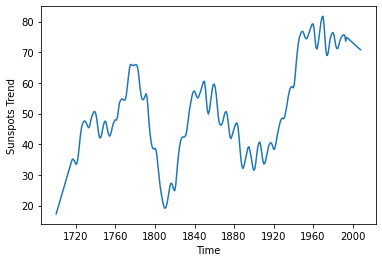

In [42]:
plt.plot(rresult1.trend)
plt.xlabel('Time')
plt.ylabel('Sunspots Trend')

Text(0, 0.5, 'Sunspots Seasonal')

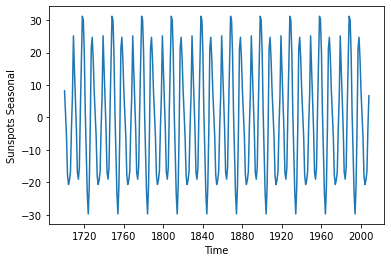

In [43]:
plt.plot(res2.seasonal)
plt.xlabel('Time')
plt.ylabel('Sunspots Seasonal')

## AIRPASSENGERS

In [125]:
air.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [126]:
air.tail(10)

,#Passengers
Month,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


In [127]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Train an model

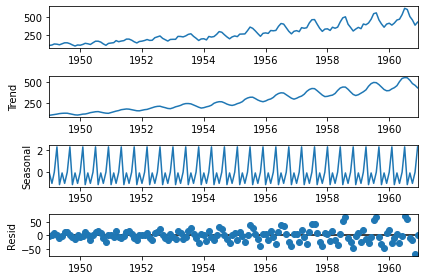

In [132]:
# PERIOD 5

result_1 = seasonal_decompose(air, period=5, model='additive', extrapolate_trend=True)
result_1.plot()
plt.show()

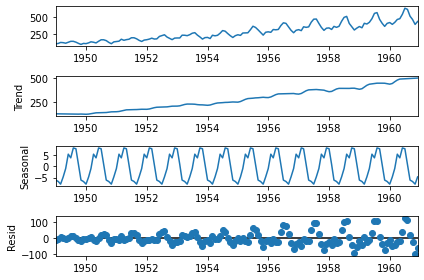

In [133]:
# PERIOD 10

result_2 = seasonal_decompose(air, period=10, model='additive', extrapolate_trend=True)
result_2.plot()
plt.show()

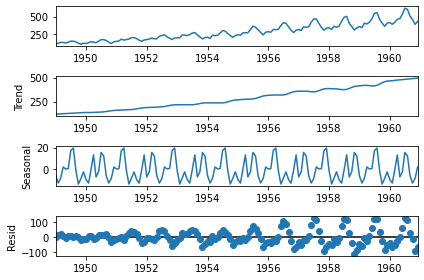

In [134]:
# PERIOD 20

result_3 = seasonal_decompose(air, period=20, model='additive', extrapolate_trend=True)
result_3.plot()
plt.show()

In [135]:
# Forecasting

import statsmodels.api as sm

y_hist = air.loc[:, '#Passengers']
h = len(y_hist)



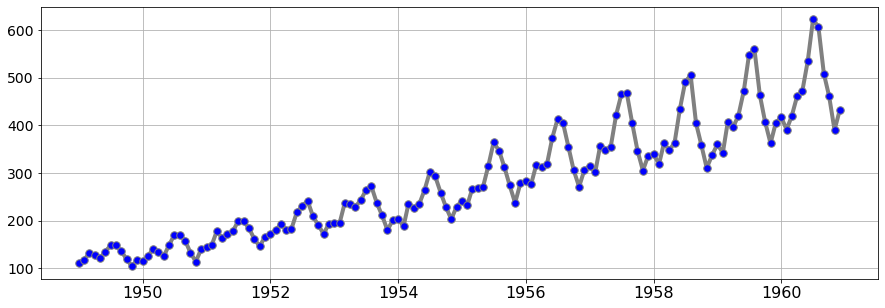

In [136]:
# Data_Airpassenger
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot() # nrows, ncols, index
ax.set_facecolor('white')
plt.plot(y_hist,'.-',
         markerfacecolor='blue',
         markersize=15,
         linewidth=4,
         color='grey')
plt.grid()
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=16)
# plt.xlim((6000, 19000))
myylim = plt.ylim()